# Yahoo financials

In [7]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import yahoofinancials as yf

#from pandas.plotting import lag_plot
#from pandas.plotting import autocorrelation_plot

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

START, END = '2003-01-01', (datetime.datetime.utcnow() - 
                                datetime.timedelta(days=1)).strftime('%Y-%m-%d')

def load_stock_data(idxs, start='2010-01-01', end='2020-06-01',
                    interval='daily'):
    data = yf.YahooFinancials(idxs)
    data = data.get_historical_price_data(start_date=start, 
                                          end_date=end, 
                                          time_interval=interval)
    df = []
    for col in idxs:
        tmp = pd.DataFrame(data[col]['prices'])
        tmp['stockname'] = col
        try:
            tmp['currency'] = data[col]['currency']
        except:
            tmp['currency'] = ''
        df.append(tmp)
    df = pd.concat(df)
    df['formatted_date'] = pd.to_datetime(df['formatted_date'], 
                                        format='%Y-%m-%d').dt.date
    df.sort_values(['stockname', 'formatted_date'], inplace=True)
    return df

In [2]:
dax = pd.read_csv('data/dax_components.csv', sep=';')
dax = pd.concat([dax, pd.DataFrame.from_dict({'Ticker': '^GDAXI',
                        'Name': 'DAX PERFORMANCE-INDEX'}, 
                        orient='index').transpose()]).reset_index(drop=True)
dax.head()

,Ticker,Name
0,EOAN.DE,E.ON SE
1,WDI.DE,Wirecard AG
2,VNA.DE,Vonovia SE
3,BEI.DE,Beiersdorf Aktiengesellschaft
4,SAP.DE,SAP SE


In [3]:
dax_historic = load_stock_data(dax['Ticker'].values, START, END, 'daily')

In [4]:
dax_historic['formatted_date'] = pd.to_datetime(dax_historic['formatted_date'])
dax_historic['month'] = dax_historic['formatted_date'].dt.month
dax_historic['year'] = dax_historic['formatted_date'].dt.year

In [5]:
dpivot = dax_historic.pivot(index='formatted_date', columns='stockname', values='close')
dpivot.head()

stockname,1COV.DE,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CON.DE,DAI.DE,DB1.DE,DBK.DE,DPW.DE,DTE.DE,EOAN.DE,FME.DE,FRE.DE,HEI.DE,HEN3.DE,IFX.DE,LHA.DE,LIN.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,TKA.DE,VNA.DE,VOW3.DE,WDI.DE,^GDAXI
formatted_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-01,NaN,20.575001,NaN,18.040001,20.450001,35.366699,28.920000,14.4087,29.350000,38.160000,34.099400,10.00,12.25,11.6158,13.1533,4.00556,32.740898,6.726670,6.99000,8.78,NaN,12.7000,NaN,NaN,18.879999,39.245701,10.65,NaN,NaN,NaN,NaN
2003-01-02,NaN,20.850000,98.470001,19.325001,21.207300,35.533298,30.400000,14.9405,31.900000,38.150002,37.051102,10.60,13.01,12.7034,13.0733,3.91111,32.634998,20.400000,6.80265,9.78,NaN,12.9923,121.199997,26.142900,20.200001,42.928001,11.24,NaN,27.434999,NaN,3105.040039
2003-01-03,NaN,20.542500,97.400002,19.040001,21.256500,35.000000,30.290001,15.1629,30.809999,37.700001,36.553902,10.91,13.10,12.7487,13.3000,3.95000,33.673199,20.340000,6.90964,9.92,NaN,13.2138,123.139999,26.023300,21.522499,41.910500,11.29,NaN,27.604000,NaN,3092.939941
2003-01-06,NaN,20.587500,98.849998,19.625000,22.063400,35.250000,30.469999,14.7278,31.480000,38.000000,36.002399,10.95,13.87,12.9450,13.6267,4.11111,34.115601,20.430000,7.22168,9.61,NaN,13.6126,123.349998,26.701099,21.947500,43.645100,11.65,NaN,27.931999,NaN,3157.250000
2003-01-07,NaN,20.500000,95.739998,19.170000,21.699301,35.436699,30.059999,14.9889,31.330000,37.040001,35.606300,10.61,13.64,12.7366,13.4333,4.16333,34.341301,20.469999,7.06120,9.30,NaN,13.5437,121.099998,26.312401,22.312500,43.218700,11.51,NaN,27.534401,NaN,3112.770020


# Correlation matrix

Text(294.0, 0.5, 'Stock')

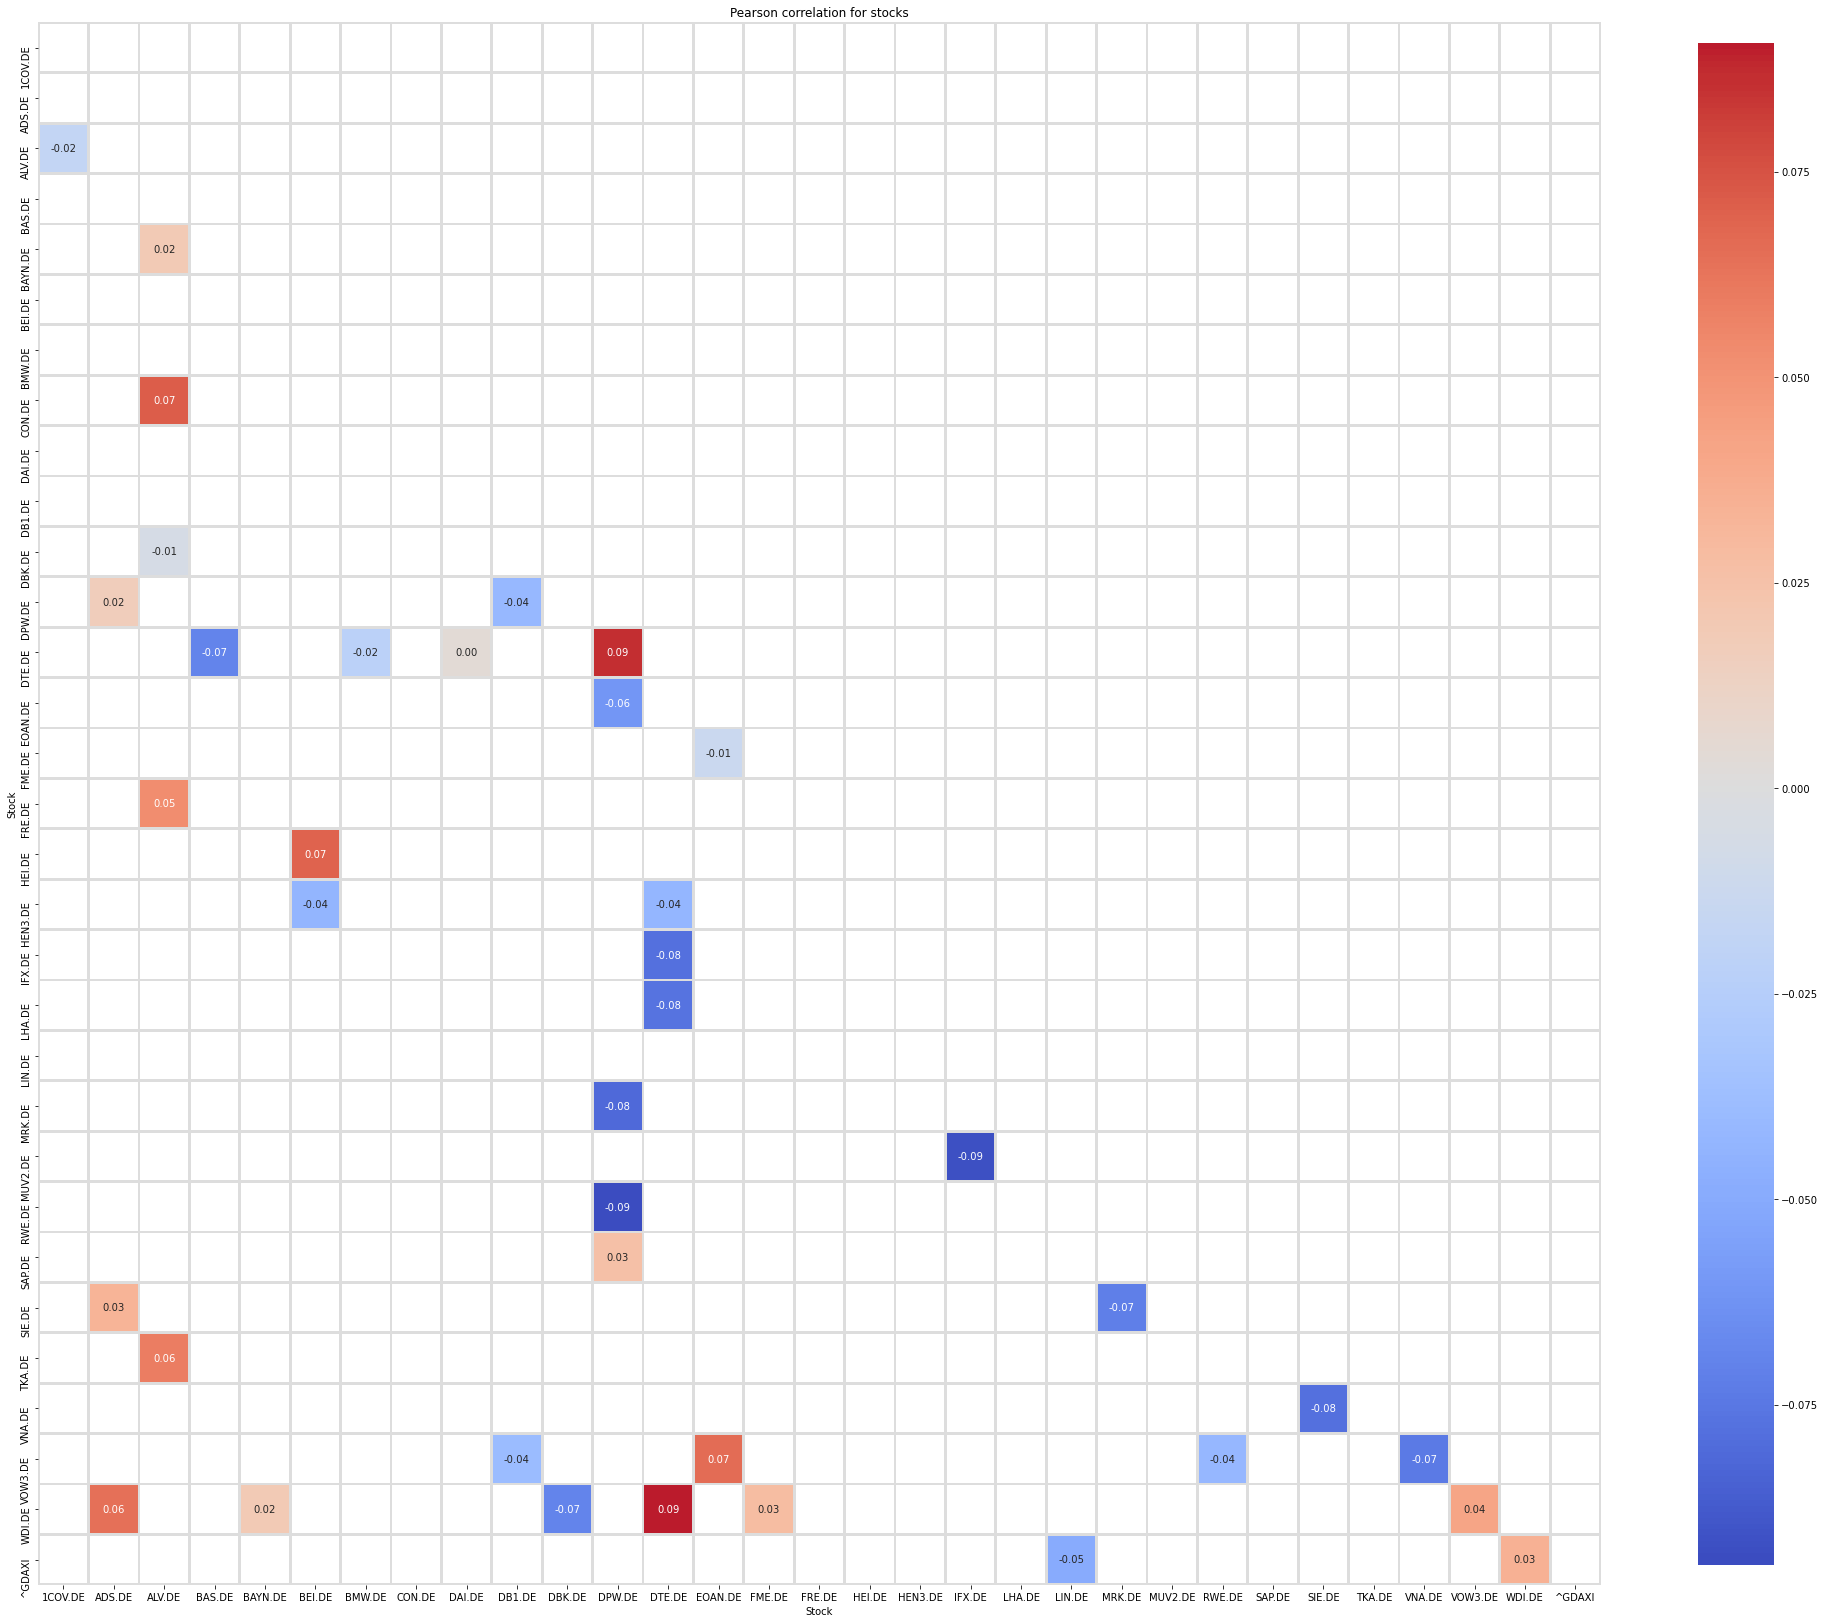

In [8]:
corr = dpivot[dpivot.index>'2018-01-01'].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(35, 35))
sb.heatmap(corr[abs(corr)<0.1], mask=mask, center=0, annot=True,
           fmt='.2f', square=True, linewidths=2, linecolor='#DDDDDD',
           cmap='coolwarm', 
           cbar_kws={"shrink": .8})
plt.title('Pearson correlation for stocks');
plt.xlabel('Stock')
plt.ylabel('Stock')

# Principal components of the DAX

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [10]:
pipeline = Pipeline([
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler()),
        ('pca', PCA(0.95))
])

In [11]:
dpivot_transform = pipeline.fit_transform(dpivot.values[:, :-1]) # reject DAX as part of it
axis = pd.DataFrame(dict(pipeline.get_params()['steps'])['pca'].components_).transpose()
axis.index = dpivot.columns[:-1]
axis.columns = ['pca_{}'.format(i) for i in range(7)]
axis.head()

#dict(pipeline.get_params()['steps'])['pca'].explained_variance_ratio_

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
stockname,,,,,,,
1COV.DE,0.033899,0.140938,-0.116648,0.526032,-0.509021,0.053342,-0.121827
ADS.DE,0.209290,-0.054927,0.231644,-0.025219,-0.069791,0.049317,-0.113734
ALV.DE,0.211168,0.171131,0.147291,0.000782,0.092547,-0.130183,-0.122242
BAS.DE,0.213473,-0.025297,-0.196672,-0.091467,-0.187909,-0.003118,0.040348
BAYN.DE,0.204211,-0.017647,-0.248875,-0.092558,0.019311,0.115147,-0.011989


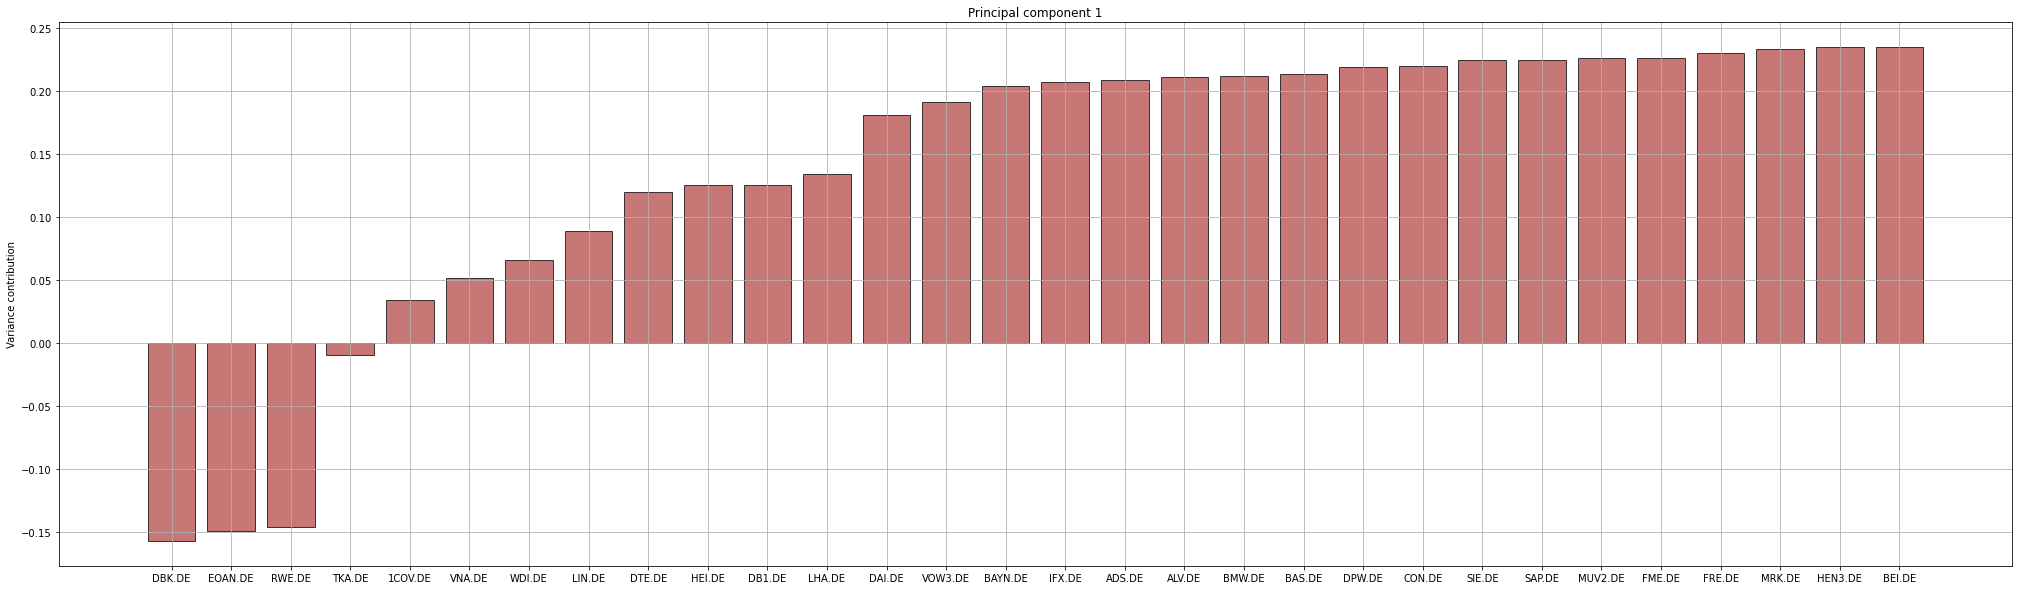

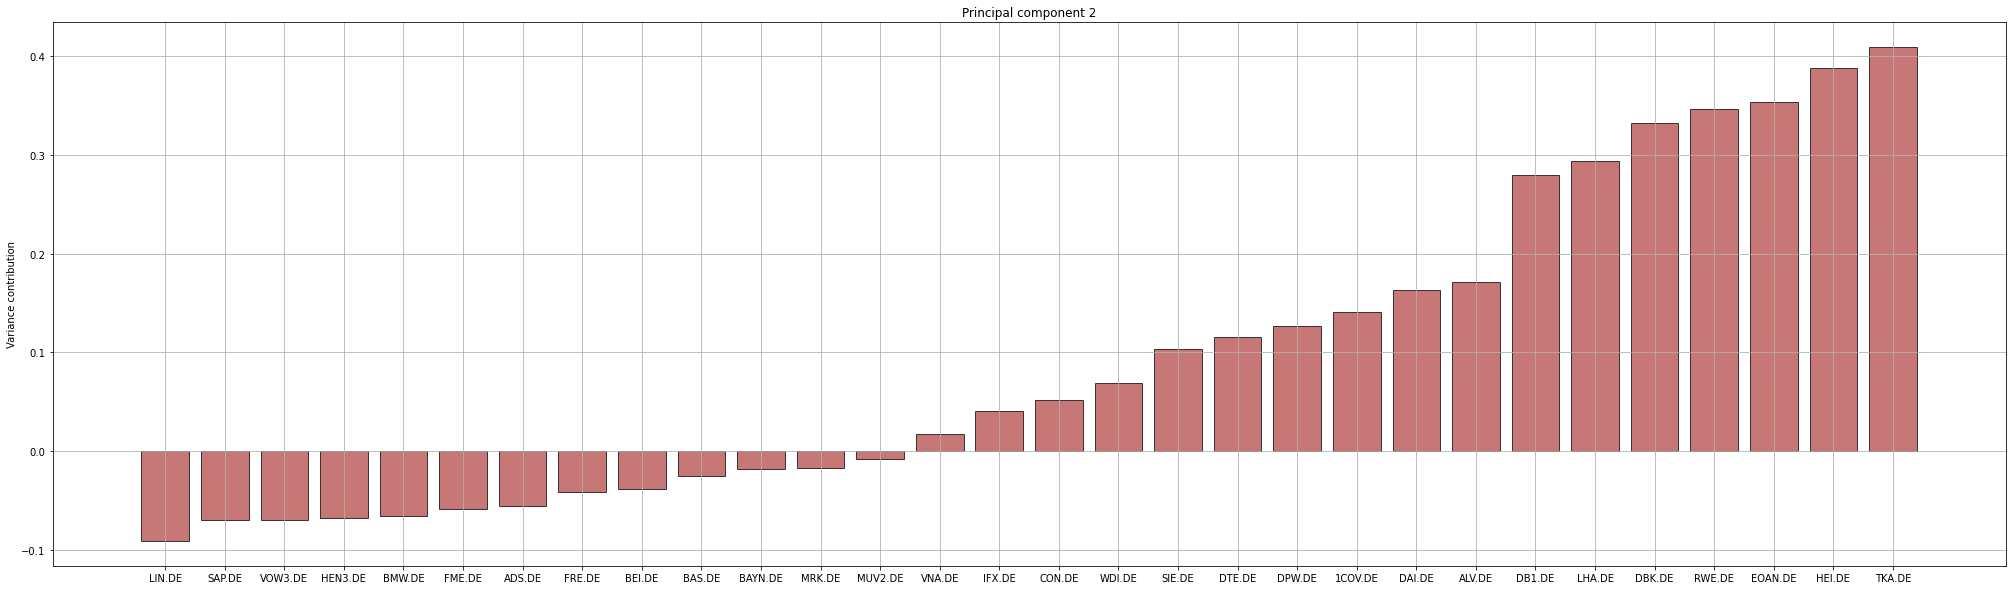

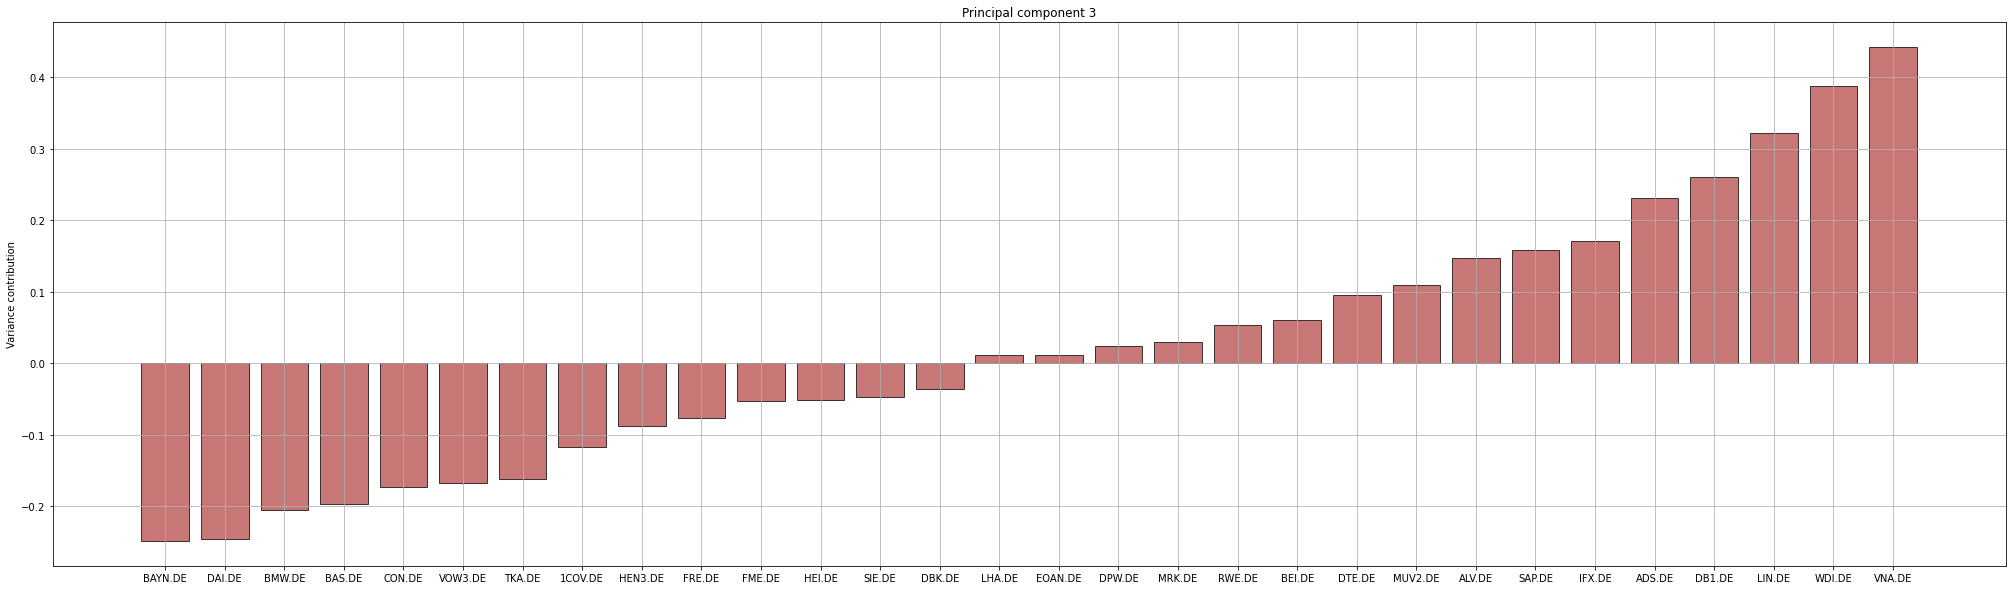

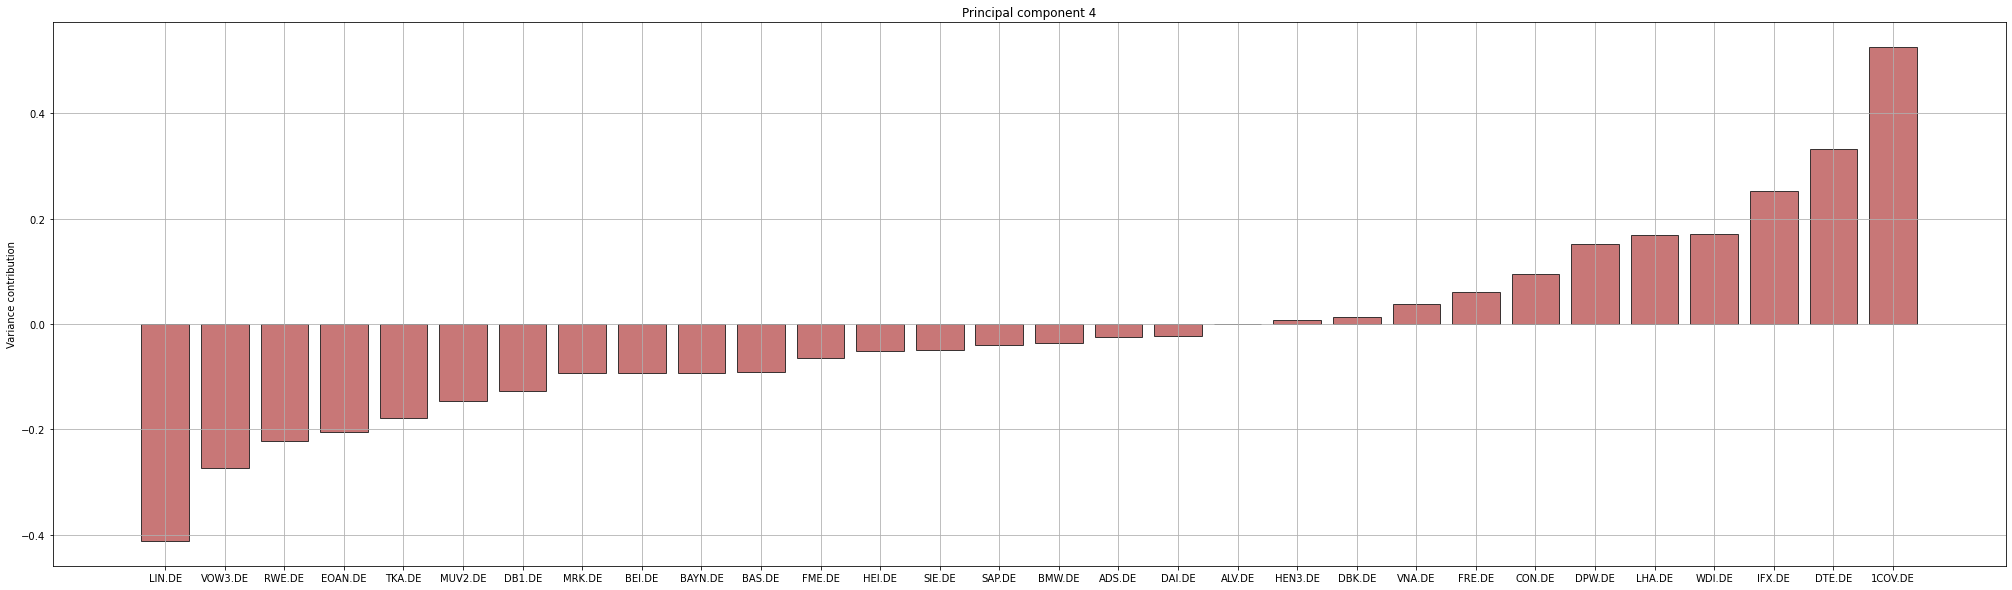

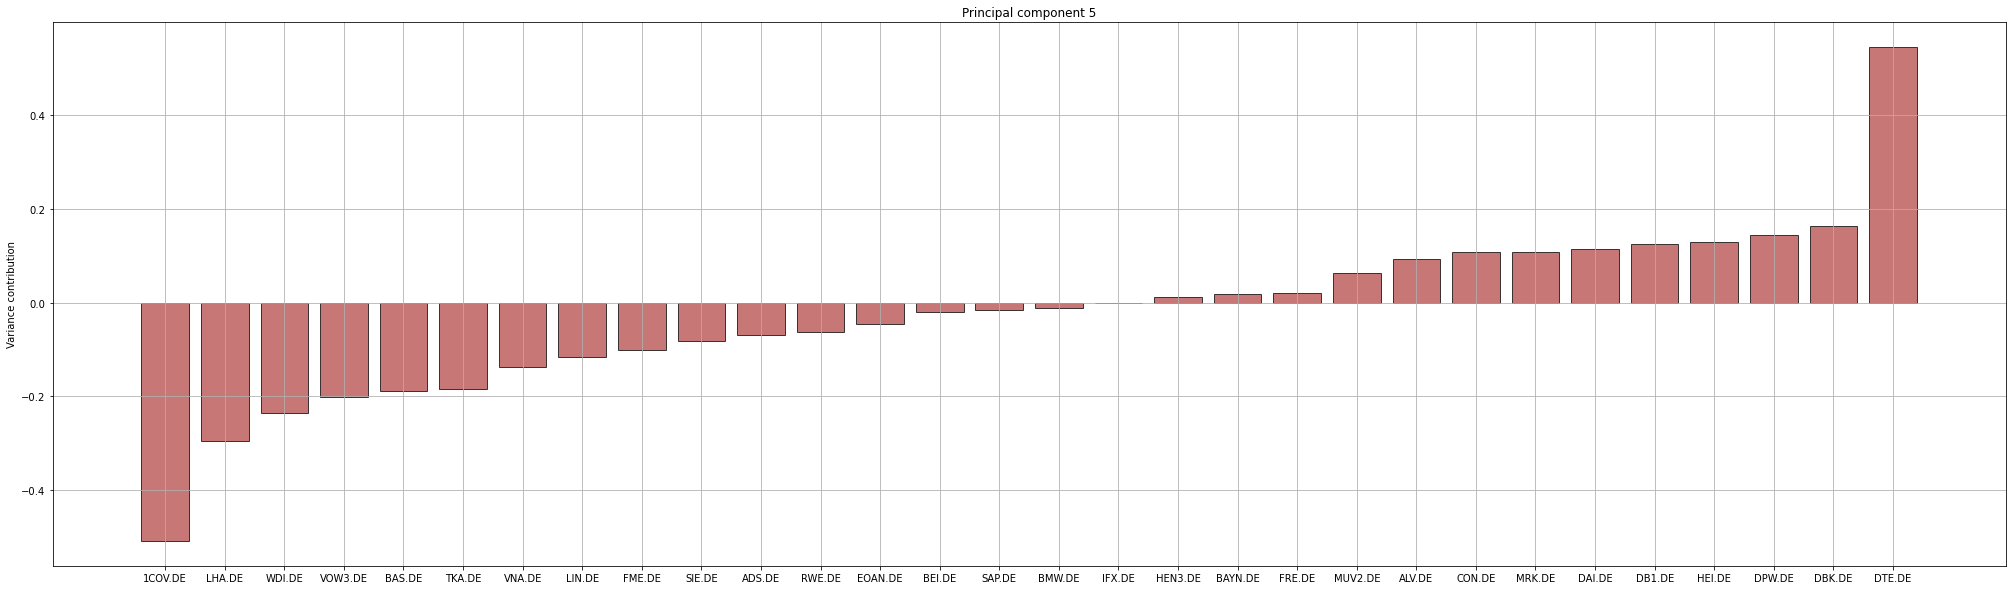

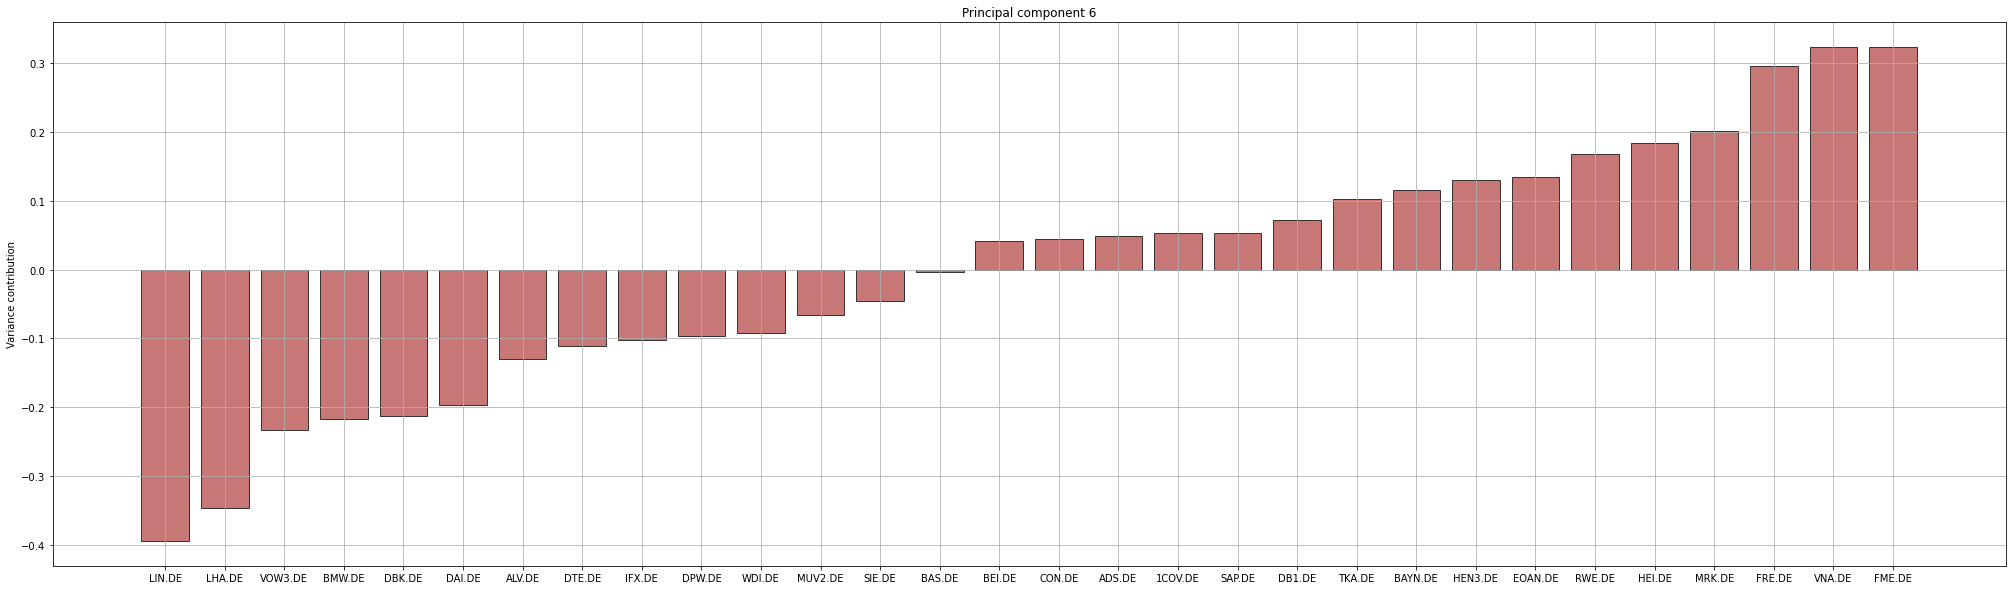

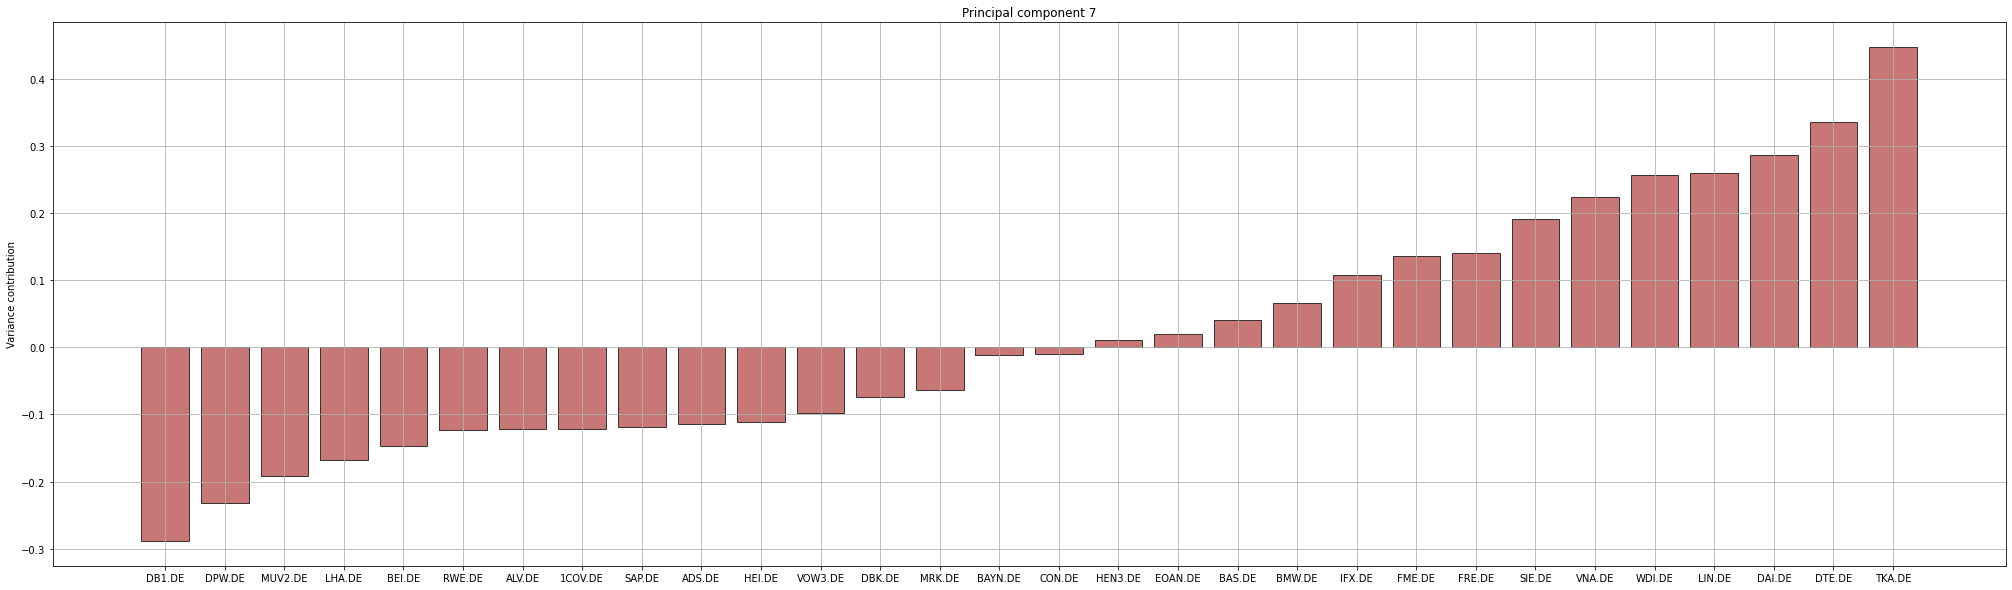

In [27]:
for i in range(7):
    fig, ax = plt.subplots(figsize=(35, 10))
    ax.grid()
    axis.sort_values(['pca_{}'.format(i)], inplace=True)
    ax.bar(np.arange(0, 30), axis['pca_{}'.format(i)], edgecolor='#111111',
            alpha=.8, color='#BB5555')
    plt.xticks(np.arange(0, 30), axis.index)
    ax.set_ylabel('Variance contribution')
    ax.set_title('Principal component {}'.format(i+1))
    plt.show()

Text(0, 0.5, 'Variance')

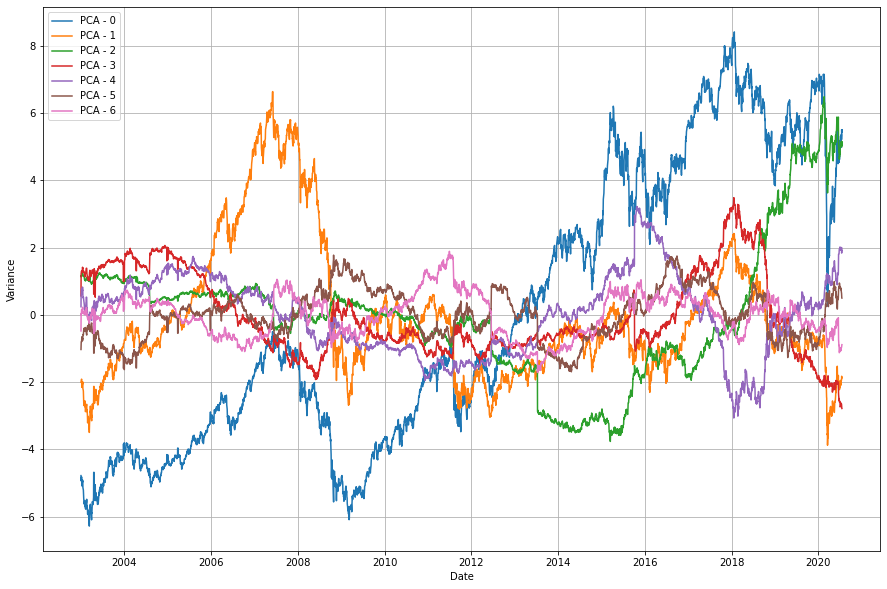

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.grid()
for i in range(7):
    ax.plot(dpivot.index, 
            dpivot_transform[:,i], label='PCA - {}'.format(i))
    
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Variance')